In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("spam.csv", encoding = "ISO-8859-1")

In [5]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
967,ham,What do u want when i come back?.a beautiful n...,NaN,NaN,NaN
4710,ham,Huh so slow i tot u reach long ago liao... U 2...,NaN,NaN,NaN
2471,ham,"sry can't talk on phone, with parents",NaN,NaN,NaN
4726,spam,Had your mobile 10 mths? Update to the latest ...,NaN,NaN,NaN
249,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model building
# Evaluation


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ], inplace = True)

In [11]:
df.sample(5)

,v1,v2
1492,ham,In the end she might still vomit but its okay....
1875,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
3799,spam,We tried to contact you re your reply to our o...
391,ham,Hey so this sat are we going for the intro pil...
3897,ham,Otherwise had part time job na-tuition..


In [12]:
# Rename the columns
df.rename(columns={'v1':'target', 'v2' : 'text'}, inplace = True)

In [13]:
df.sample(5)

,target,text
2082,ham,I'm done oredi...
1640,ham,"Alright, we're all set here, text the man"
657,ham,You will be in the place of that man
4410,ham,Ya but it cant display internal subs so i gott...
1294,ham,Aiyah u did ok already lar. E nydc at wheellock?


In [14]:
!pip install scikit-learn

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Remove missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# Check for Duplicates

df.duplicated().sum()

403

In [20]:
df = df.drop_duplicates(keep = 'first')

In [21]:
df.shape

(5169, 2)

# EDA

In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1dc748a6750>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

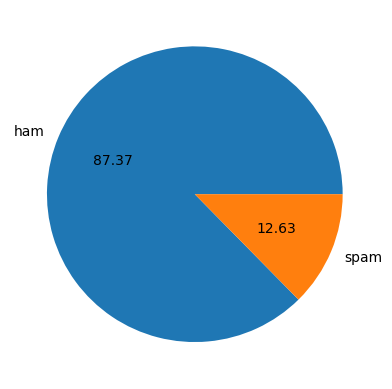

In [23]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [24]:
!pip install nltk
import nltk

In [25]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\Amit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)

In [27]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# num of Sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [33]:
df[['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

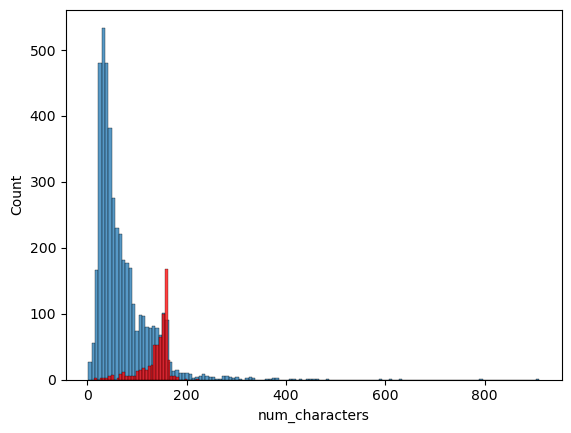

In [34]:
# Data Visualization Module

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1] ['num_characters'], color = 'red')

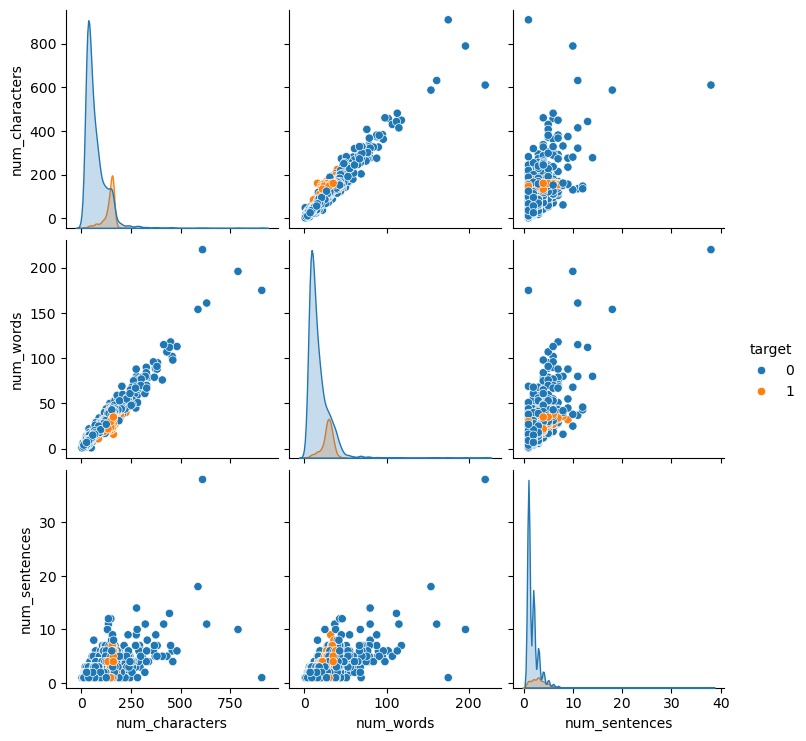

In [35]:
sns.pairplot(df, hue = 'target')

<Axes: >

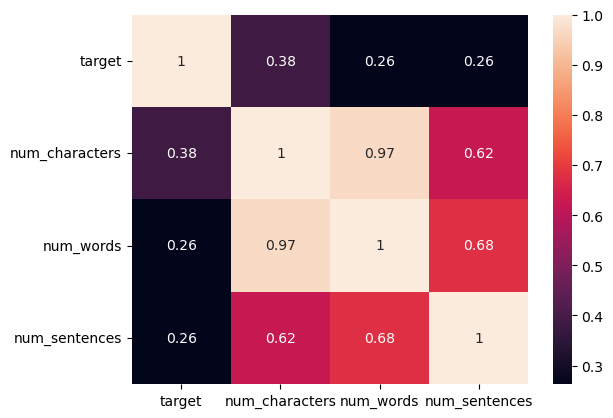

In [36]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

# Data Preprocessing

In [37]:
# lowercase
# tokenize
# Remove special characters like , . !, $ etc.
# Remove Stowords
# Remove Punctuation
# Stemming

In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
import string


# Transform(Text)----> apply above methods ----> Clean Data

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Lower Casing
    text = nltk.word_tokenize(text)  # Tokenization

    y = []
    # Remove non-alphanumeric characters
    for word in text:
        if word.isalnum():
            y.append(word)

    text = y[:]  # Update text to contain only alphanumeric words
    y.clear()

    # Remove stopwords and punctuations
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)

    text = y[:]  # Update text after removing stopwords and punctuations
    y.clear()

    # Perform stemming
    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)  # Return the transformed text



[nltk_data] Downloading package punkt to C:\Users\Amit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     Panchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
transform_text("I'm gonna be home soon and i dont't want to talk to anyone about it. ")

'gon na home soon want talk anyon'

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
!pip install wordcloud


In [46]:
import wordcloud


In [47]:
from wordcloud import WordCloud

In [48]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

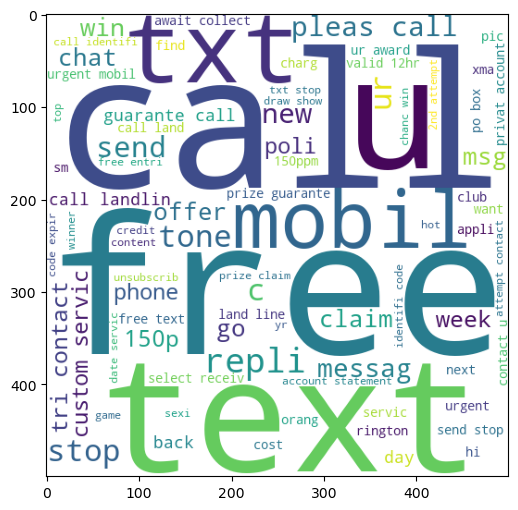

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

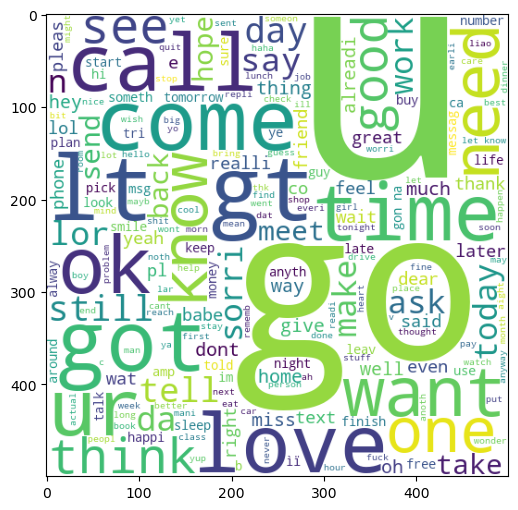

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter

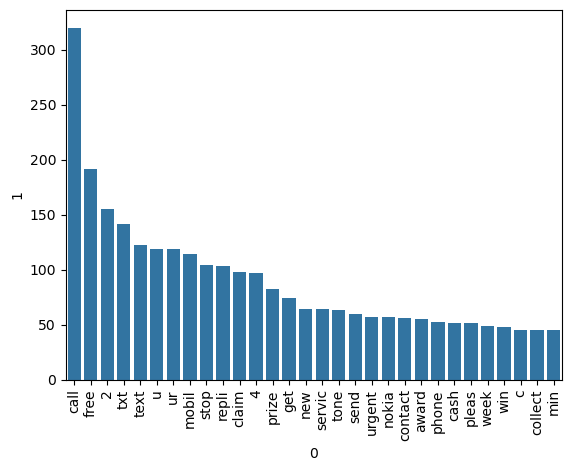

In [56]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y =pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [57]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

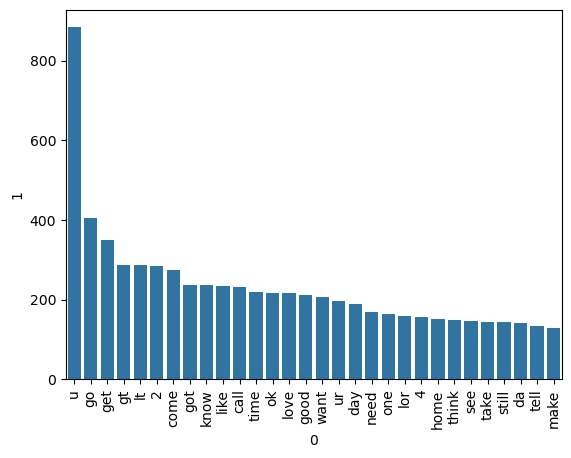

In [59]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000 )

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 3000)

In [64]:
X[0].shape

(3000,)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
mng = MultinomialNB()
bnb = BernoulliNB()

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [71]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mng.fit(X_train, y_train)
y_pred1 = mng.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
import pickle

In [77]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mng, open('model.pkl', 'wb'))